In [117]:
import json
import requests
from PIL import Image
import io
from dotenv import dotenv_values
import pytesseract

config = dotenv_values("../.env")

In [22]:
url_token = "https://id.twitch.tv/oauth2/token"
client_id = config.get("CLIENT_ID")
client_secret = config.get("CLIENT_SECRET")

In [24]:
form_urlencoded = f"client_id={client_id}&client_secret={client_secret}&grant_type=client_credentials"
req = requests.post(url_token, data=form_urlencoded)

In [25]:
req.status_code

200

In [30]:
res_content = json.loads(req.content)

In [33]:
access_token = res_content["access_token"]

In [45]:
basic_headers = {
    "Authorization": f"Bearer {access_token}",
    'Client-Id': client_id
}

In [44]:
res = requests.get('https://api.twitch.tv/helix/users?login=twitchdev', headers=basic_headers)
res.content

b'{"data":[{"id":"141981764","login":"twitchdev","display_name":"TwitchDev","type":"","broadcaster_type":"partner","description":"Supporting third-party developers building Twitch integrations from chatbots to game integrations.","profile_image_url":"https://static-cdn.jtvnw.net/jtv_user_pictures/8a6381c7-d0c0-4576-b179-38bd5ce1d6af-profile_image-300x300.png","offline_image_url":"https://static-cdn.jtvnw.net/jtv_user_pictures/3f13ab61-ec78-4fe6-8481-8682cb3b0ac2-channel_offline_image-1920x1080.png","view_count":0,"created_at":"2016-12-14T20:32:28Z"}]}'

## Get Streams

In [99]:
url_streams = "https://api.twitch.tv/helix/streams"
query_params = basic_headers.copy()

query_params["type"] = "live"
query_params["game_id"] = "5432"
query_params["language"] ="fr"
query_params["first"] = "1"

In [100]:
res = requests.get(url_streams, headers=query_params)
res

<Response [200]>

In [101]:
res_json = json.loads(res.content)

In [102]:
thumbnail_url = res_json["data"][0]["thumbnail_url"]

In [111]:
thumbnail_url = thumbnail_url.replace("{width}", "1600").replace("{height}", "900")
thumbnail_url

'https://static-cdn.jtvnw.net/previews-ttv/live_user_xqc-1600x1600.jpg'

In [112]:
image_res = requests.get(thumbnail_url)

In [113]:
image_io = io.BytesIO(image_res.content)

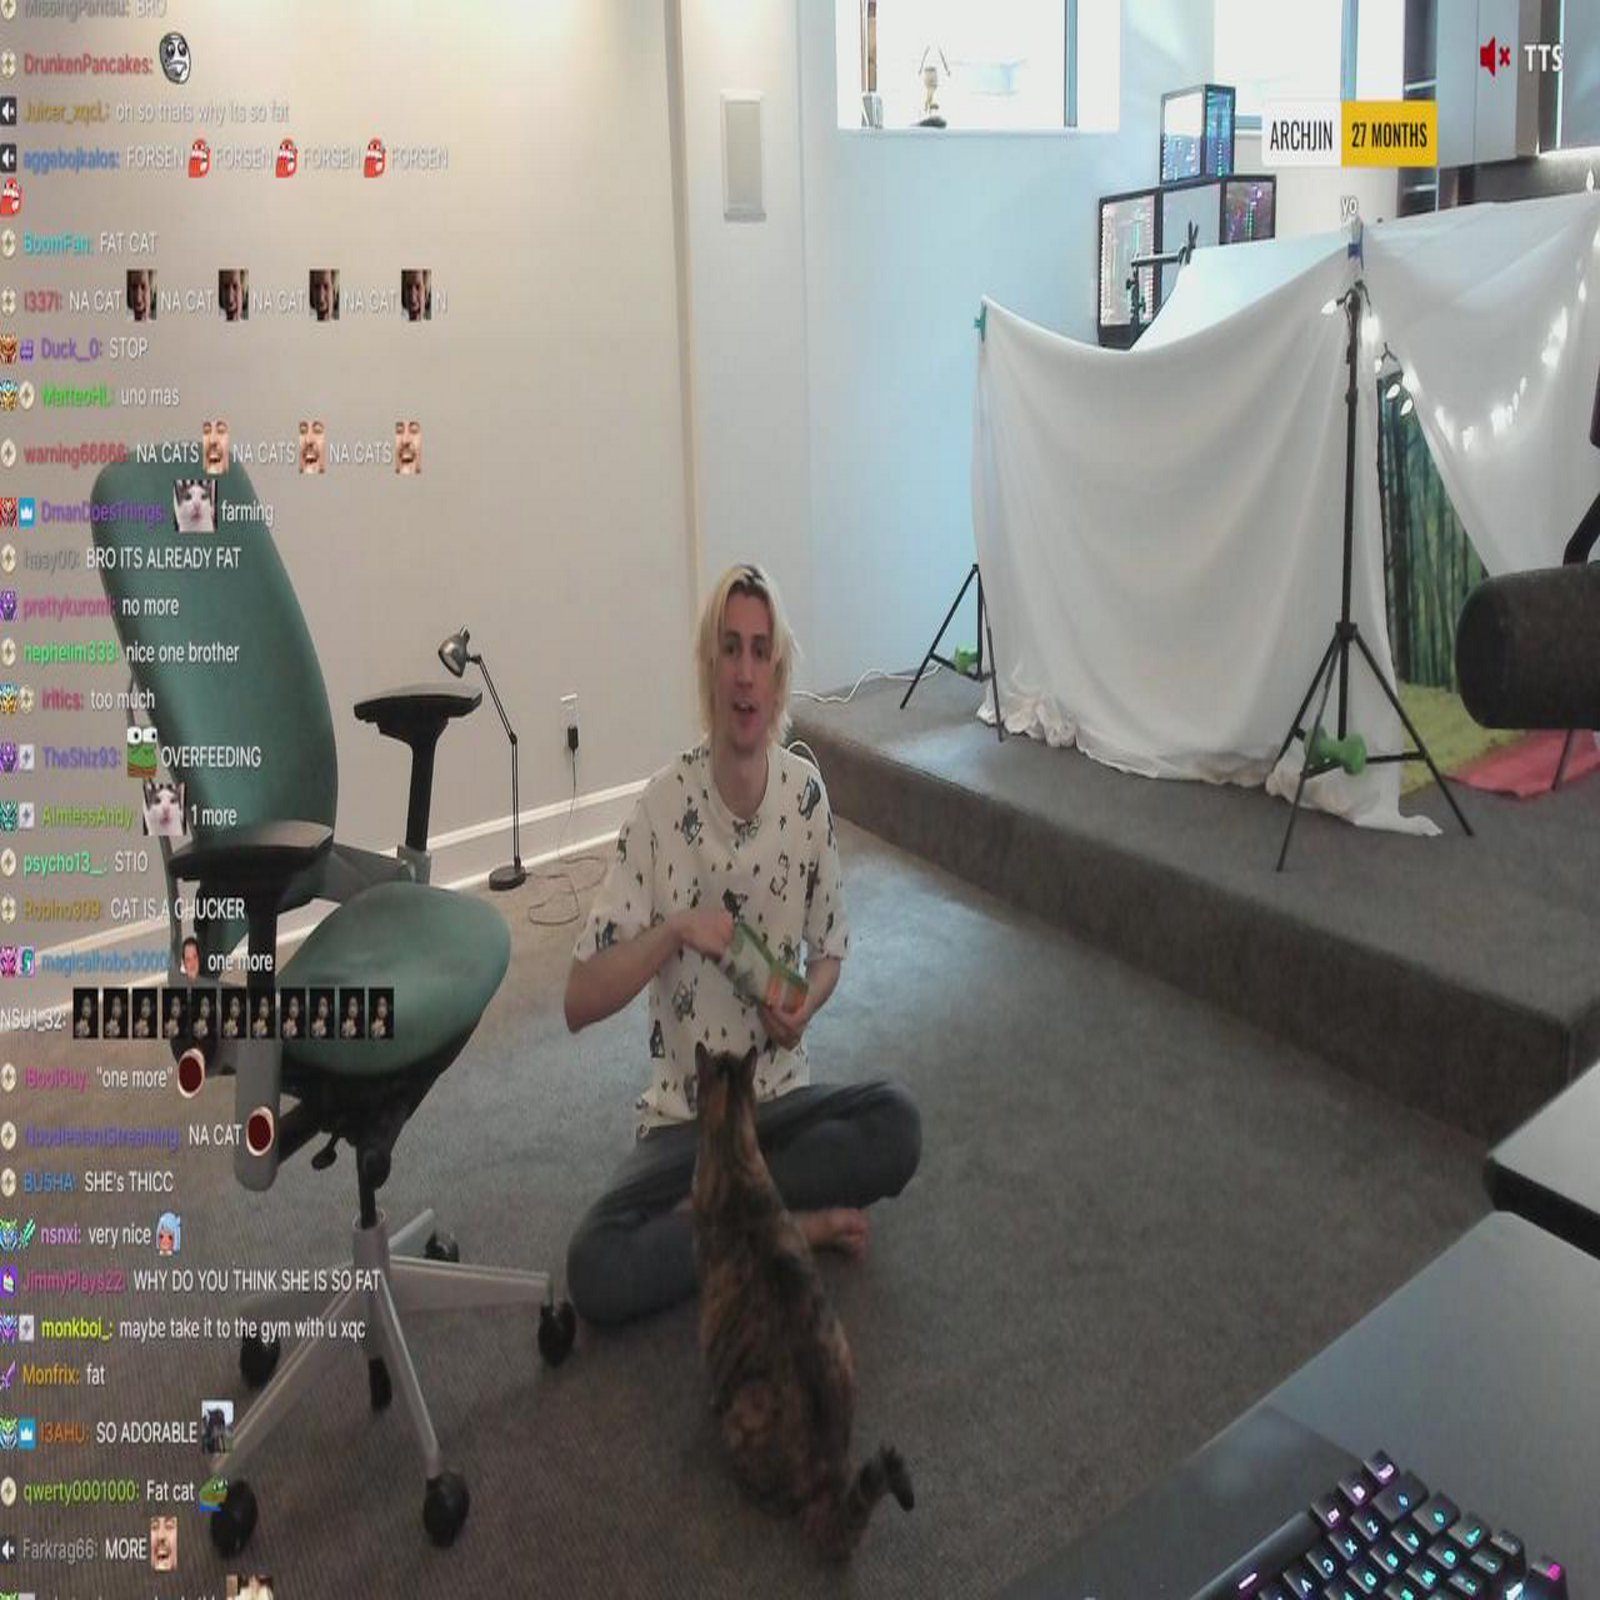

In [114]:
img = Image.open(image_io)
img

In [118]:
pytesseract.image_to_string(img)

"' on\n\noe 1 more =\n\nBir\n\nOsos oe\n“ Giesuiaaiigl sR)\n@ ©.546 SHE's THICC\n\n@ 7 nom very nice : a\ntH Diirmyke \\ aes A\n\nmonkbol.; maybe take It to the gym with xqc\n\nof Monty: fat \\\n\\\n\nya sonoma’\n\n@ werty0001000: Fat cat a*\n\nev\nA,\nFeitnnee LICE A Vwi We\nd: Farkrag66 wore g AY, ke Ne\na.\n\na ie x! we? WUE\n"